In [1]:
import os, sys
sys.path.append('/rds/general/user/tla19/home/FYP/MAax')

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read JSON files
with open('boxes_times_avg.json', 'r') as f1, open('ramp_times_avg.json', 'r') as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

In [4]:
# Process data
x_values = sorted(set(data1.keys()) & set(data2.keys()))
mean1_values = []
mean2_values = []
std1_values = []
std2_values = []

x_values = x_values[:-1]

for x in x_values:
    times1 = data1[x][1:]  # Discard the first entry
    times2 = data2[x][1:]  # Discard the first entry
    mean1 = np.mean(times1)
    mean2 = np.mean(times2)
    std1 = np.std(times1)
    std2 = np.std(times2)
    mean1_values.append(mean1)
    mean2_values.append(mean2)
    std1_values.append(std1)
    std2_values.append(std2)

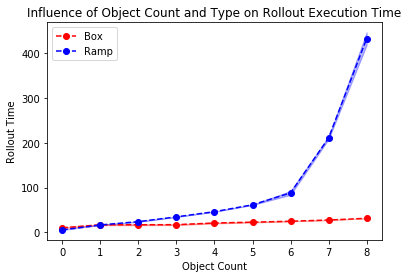

In [5]:
# Plotting
plt.plot(x_values, mean1_values, label='Box', linestyle='--', marker='o', color='red')
plt.plot(x_values, mean2_values, label='Ramp', linestyle='--', marker='o', color='blue')
plt.fill_between(x_values, np.array(mean1_values) - np.array(std1_values),
                 np.array(mean1_values) + np.array(std1_values),
                 alpha=0.3, color='red')
plt.fill_between(x_values, np.array(mean2_values) - np.array(std2_values),
                 np.array(mean2_values) + np.array(std2_values),
                 alpha=0.3, color='blue')
plt.xlabel('Object Count')
plt.ylabel('Rollout Time')
plt.yscale('linear')
plt.legend()
# plt.title('Influence of Object Count and Type on Rollout Execution Time')
plt.savefig('boxvramp.png')
plt.show()